<a href="https://colab.research.google.com/github/rayshu/Data-Classification/blob/master/GloVe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import spacy
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

pd.options.display.max_colwidth = 200
%matplotlib inline

In [0]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Load Data

In [0]:
corpus = []
with open('/content/drive/My Drive/Data/IraqClean.csv', 'r') as file:
  for line in file:
    line = line.split(',')
    corpus.append(line[0])
df = pd.read_csv('/content/drive/My Drive/Data/IraqClean.csv')
df.head()

Text DocType
0  last week dyncorp international di alliance office fort worth texas welcome congresswoman kay granger visit congresswoman granger represent twelfth congressional district texas twelfth term serve ...  Public
1  wednesday january commissioner aaron demerson texas workforce commission twc present dyncorp international di hire vet award recognition commitment hire veteran hire vet employer recognition progr...  Public
2  april dyncorp international di team patuxent river naval air station program travel ingalls field hot spring virginia test distribute aperture infrared countermeasure daircm system ah z mh aircraf...  Public
3  dyncorp international alliance office donate pound food approximately toy week dallas fort worth texas metro area alliance corporate security facility real estate department help organize year cha...  Public
4  navigate various permission license operate foreign country daunt dyncorp international afghanistan operation team group eleven employee support almost program afghanistan special support range ac...  Public

## Preprocess Data

In [0]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

In [0]:
norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['text',
       'last week dyncorp international di alliance office fort worth texas welcome congresswoman kay granger visit congresswoman granger represent twelfth congressional district texas twelfth term serve congress district represent locate north texas encompasses part tarrant wise county parker county throughout tenure congresswoman granger make name leader national defense global security congresswoman currently serf rank member powerful appropriation committee oversee entire appropriation process prior become rank member granger chairwoman defense appropriation subcommittee chairwoman directly oversaw fifty percent appropriation spending make address military readiness top priority congresswoman visit met senior executive held town hall style gathering lobby address di employee throughout visit senior leadership highlight dis many win overall success company meeting senior leadership congresswoman welcome sea red support troop shirt alliance office foyer di grateful con

In [0]:
print('Total lines:', len(corpus))
print('\nSample line:', corpus[1])
print('\nProcessed line:', norm_corpus[1])

Total lines: 1687

Sample line: last week dyncorp international di alliance office fort worth texas welcome congresswoman kay granger visit congresswoman granger represent twelfth congressional district texas twelfth term serve congress district represent locate north texas encompasses part tarrant wise county parker county throughout tenure congresswoman granger make name leader national defense global security congresswoman currently serf rank member powerful appropriation committee oversee entire appropriation process prior become rank member granger chairwoman defense appropriation subcommittee chairwoman directly oversaw fifty percent appropriation spending make address military readiness top priority congresswoman visit met senior executive held town hall style gathering lobby address di employee throughout visit senior leadership highlight dis many win overall success company meeting senior leadership congresswoman welcome sea red support troop shirt alliance office foyer di gra

## GloVe Embeddings with spaCy

In [0]:
!spacy download en_vectors_web_lg

     |████████████████████████████████| 661.8MB 1.1MB/s 
  Created wheel for en-vectors-web-lg: filename=en_vectors_web_lg-2.1.0-cp36-none-any.whl size=663461747 sha256=b5e4b94c341159bce3392ddce6b61a371b06ab095123edd8f347f07c4c539337
  Stored in directory: /tmp/pip-ephem-wheel-cache-vad06v1m/wheels/ce/3e/83/59647d0b4584003cce18fb68ecda2866e7c7b2722c3ecaddaf
Successfully built en-vectors-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_vectors_web_lg')


In [0]:
nlp = spacy.load('en_vectors_web_lg')
total_vectors = len(nlp.vocab.vectors)
print('Total word vectors:', total_vectors)

Total word vectors: 1070971


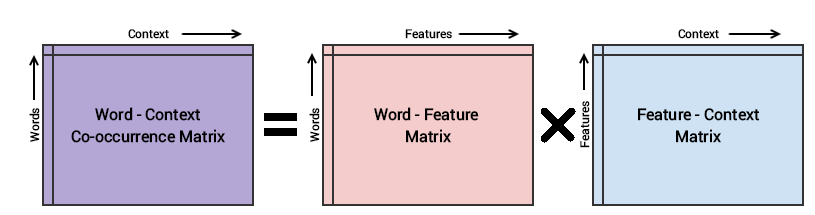


We initialize WF and FC with some random weights and attempt to multiply them to get WC’ (an approximation of WC) and measure how close it is to WC. We do this multiple times to minimize the error. Finally, the Word-Feature matrix (WF) gives us the word embeddings for each word where F can be preset to a specific number of dimensions.

## Visualize GloVe word embeddings

In [0]:
unique_words = list(set([word for sublist in [doc.split() for doc in norm_corpus] for word in sublist]))

word_glove_vectors = np.array([nlp(word).vector for word in unique_words])
pd.DataFrame(word_glove_vectors, index=unique_words).to_csv('/content/drive/My Drive/Data/gloveIraq.csv', index=False)
pd.DataFrame(word_glove_vectors, index=unique_words)

0         1         2    ...       297       298      299
implication       -0.32353 -0.241620 -0.061503  ...  0.111450  0.025605  0.10123
brendan            0.12956  0.094718 -0.175030  ...  0.090686 -0.027655 -0.39662
directinformation  0.00000  0.000000  0.000000  ...  0.000000  0.000000  0.00000
sponsor            0.16926 -0.131130 -0.178590  ...  0.019949  0.270300  0.36224
insecurity        -1.07450  0.014599  0.440450  ...  0.424400 -0.492600 -0.10834
...                    ...       ...       ...  ...       ...       ...      ...
ny                -0.17134  0.380140 -0.523680  ... -0.586190 -0.320450  0.21410
erating            0.00000  0.000000  0.000000  ...  0.000000  0.000000  0.00000
payroll           -0.69826  0.013573  0.440690  ...  0.244420 -0.089461 -0.50442
pair               0.30822 -0.420000 -0.189280  ... -0.451540  0.238400 -0.42809
british           -0.27106 -0.037942  0.305350  ... -0.430160 -0.163240  0.14179

[10001 rows x 300 columns]

In [0]:
tsne = TSNE(n_components=2, random_state=0, n_iter=500, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_glove_vectors)
labels = unique_words

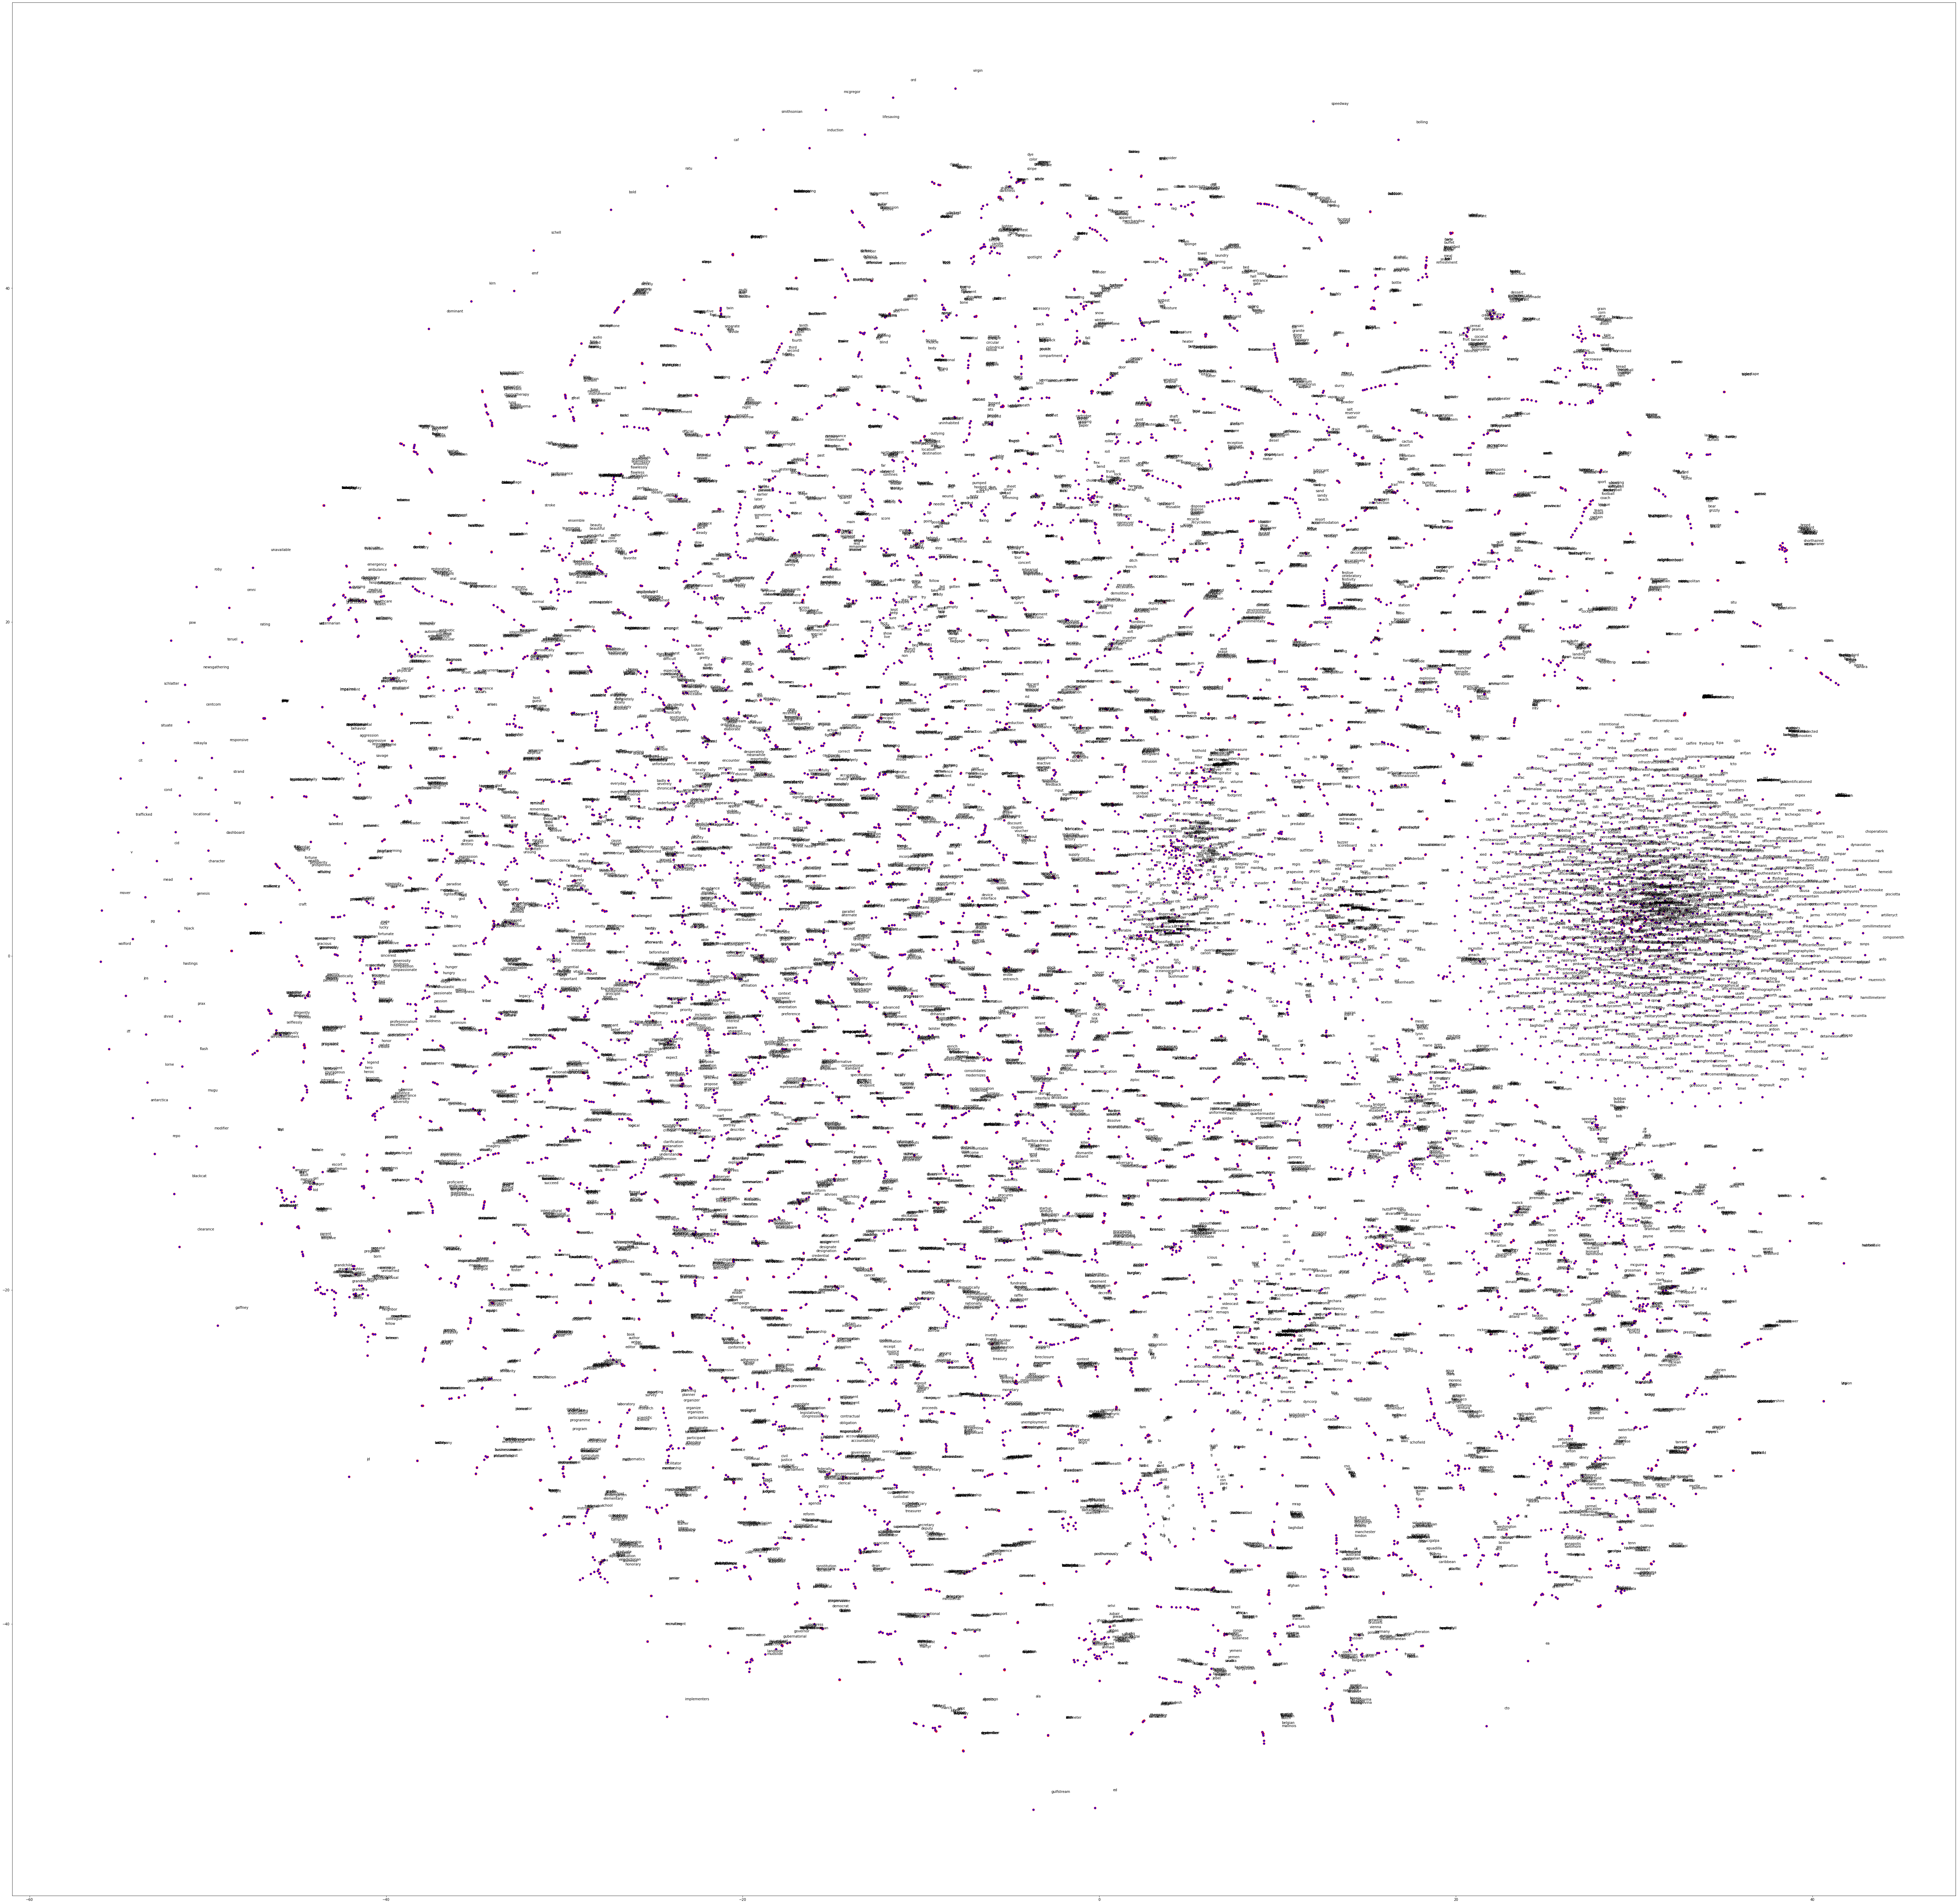

In [0]:
plt.figure(figsize=(100, 100))
plt.scatter(T[:, 0], T[:, 1], c='blue', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')
plt.savefig('/content/drive/My Drive/Data/gloveIraq.jpg')

### k-means Clustering to get clusters

In [0]:
doc_glove_vectors = np.array([nlp(str(doc)).vector for doc in norm_corpus])

km = KMeans(n_clusters=2, random_state=0)
km.fit_transform(doc_glove_vectors)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([df, cluster_labels], axis=1)

Text  ... ClusterLabel
0     last week dyncorp international di alliance office fort worth texas welcome congresswoman kay granger visit congresswoman granger represent twelfth congressional district texas twelfth term serve ...  ...            1
1     wednesday january commissioner aaron demerson texas workforce commission twc present dyncorp international di hire vet award recognition commitment hire veteran hire vet employer recognition progr...  ...            0
2     april dyncorp international di team patuxent river naval air station program travel ingalls field hot spring virginia test distribute aperture infrared countermeasure daircm system ah z mh aircraf...  ...            0
3     dyncorp international alliance office donate pound food approximately toy week dallas fort worth texas metro area alliance corporate security facility real estate department help organize year cha...  ...            0
4     navigate various permission license operate foreign country daunt dyncorp international afghanistan operation team group eleven employee support almost program afghanistan special support range ac...  ...            0
...                                                                                                                                                                                                       ...  ...          ...
1682  cavalry number denotes specific regiment ia feb ninewah province mosul neighborhood cache confirm cavalry number denotes specific regiment ineffective cavalry number denotes specific regiment ia f...  ...            1
1683  nation report mnd event unit ia event type unexploded ordnance feb amillimeterunition found within cache unknown assessment employment cache timeline task force tactical operation center report ia...  ...            1
1684  mnd event unit event type weapon cache feb assessment employment cache example improvised explosive device indirect fire small arm fire timeline nptt report cache found take j nptt request explosi...  ...            1
1685  late report engineering en report spot appear x mm mortar meter road wood line vicinity upon investigation x mm dart x mm mortar round discover ia recover round later battle damage assessment x mm...  ...            1
1686                                                                                                                                                                                                      NaN  ...            1

[1687 rows x 3 columns]